In [4]:
# !pip install nltk
# !pip install autocorrect
# !pip install wordcloud

# for Preprocessing NLP Data
- removing non alphabetic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction

In [5]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm #It will show progress bar

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ETOOSINDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ETOOSINDIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
data=pd.read_csv(r'F:\Computer Science\Data\Spam-Classifier-using-naive-bayes-main\spam.csv')


In [8]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True) # axis=1 check data in column wise ; axis=0 check data in row wise

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [12]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

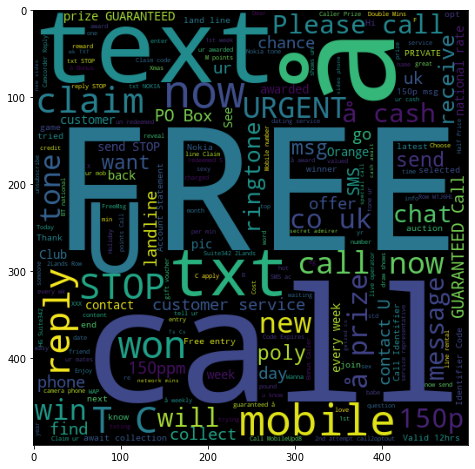

In [13]:
spam_words=' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

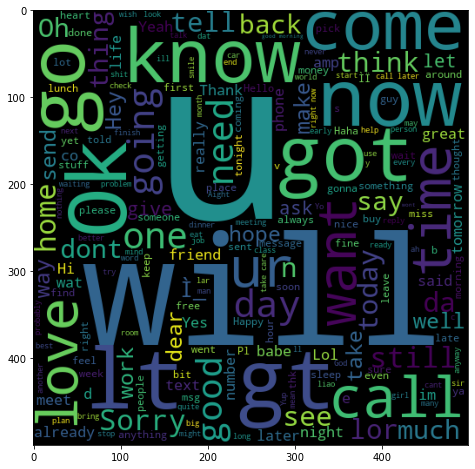

In [14]:
ham_words=' '.join(list(data[data['labels']=='ham']['messages']))
ham_wc= WordCloud(width=500,height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

# Preprocessing the data

In [15]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
data.shape

(5572, 2)

In [21]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [17]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [10:04<00:00,  9.22it/s]


In [22]:
data

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [19]:
len(new_data)

5572

In [23]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [40]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [33]:
X_train

['think far find check google map place dorm',
 'dude fake find got money the refer u u member wit mail link u vl credit lt gt rs il get lt gt rs draw acc wen lt gt rs',
 'k k month note birthday know',
 'ex wife abl kid want kid one day',
 'idc get weasel way shit twice row',
 'remember',
 'blog blog blog miss first bowl',
 'ha ha pop loo hello ed hello',
 'goodman today late lt gt min',
 'good more love go sleep wish great day full feel better opportun last thought babe love kiss',
 'ok take care mma',
 'not',
 'hey mr what name bill prison book one language word',
 'custom loyalty offer new nokia mobil txtauction txt word start get txt tc p msg',
 'decent mobil th entity update latest colour camera mobil free call mobil update co free',
 'ah well confuse thing doesnt thought friend may wrong thing already sort invite tho may come co money',
 'ya one slow poo',
 'nd attempt contract u week top prize either cash prize call',
 'oic saw tot din c found group lia',
 'top lt gt',
 'call m

In [34]:
X_test

['u still paint ur wall',
 'meet call later',
 'hhh women bad dream u tho dont like u right didnt know any comedy night guess im',
 'hmv bonus special pound genuine hmv voucher answer east question play send hmv info www percent real com',
 'aia e rain like quit big leh drill least run home',
 'sorry call later',
 'id check like bowl worth left',
 'thank message really appreci sacrifice sure process direct pay find way back test tomorrow class wonder day',
 'boy late home father power friendship',
 'private account statement font show un redeem point call identify code expr',
 'great new offer double min double txt best orange tariff get latest camera phone free call mobileupd free stoptxt cs',
 'flirt txt girl broke ur name age eg girl zoe join get chat',
 'eh den sat u book e kb lia huh',
 'note think go monday sorry reply late',
 'phone widest auto correct',
 'loose go host de dont let careless',
 'oh rite well im best mate pete went week geva longer week',
 'got take take part wrc 

In [28]:
Y_train

1478    0
3803    0
5095    0
583     0
772     0
       ..
3444    0
2053    0
3918    0
5276    0
789     0
Name: labels, Length: 4179, dtype: int64

In [29]:
Y_test

2878    0
589     0
4955    0
4294    1
2488    0
       ..
5110    1
115     0
3662    0
1514    0
5512    0
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [31]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [32]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
Y_train

1478    0
3803    0
5095    0
583     0
772     0
       ..
3444    0
2053    0
3918    0
5276    0
789     0
Name: labels, Length: 4179, dtype: int64

In [36]:
Y_test

2878    0
589     0
4955    0
4294    1
2488    0
       ..
5110    1
115     0
3662    0
1514    0
5512    0
Name: labels, Length: 1393, dtype: int64

# Lets train our model - Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [39]:
model.fit(X_train_vect,Y_train) # training is done

GaussianNB()

In [41]:
model.classes_

array([0, 1], dtype=int64)

In [42]:
Y_pred=model.predict(X_test_vect)

In [43]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [46]:
accuracy_score(Y_test,Y_pred) * 100

86.50394831299354

In [47]:
confusion_matrix(Y_test,Y_pred) 

array([[1050,  162],
       [  26,  155]], dtype=int64)